In [48]:
import pandas as pd
import numpy as np
# import matplotlib pyplot commands
from matplotlib.pyplot import *
# Show Plots in the Notebook
%matplotlib inline
 
# 'style' the plot like fivethirtyeight.com website
style.use('bmh')

import seaborn as sns
import altair as alt

In [49]:
rcParams['figure.figsize']= (9, 5)   # set Chart Size
rcParams['font.size'] = 14            # set Font size in Chart

In [50]:
df = pd.read_excel('neep_2018-07-12.xlsx', skiprows=6)
df.head()

Manufacturer Brand \n(if applicable)  \
0  Amana Heating and air Conditioning                   Amana   
1  Amana Heating and air Conditioning                   Amana   
2  Amana Heating and air Conditioning                   Amana   
3  Amana Heating and air Conditioning                   Amana   
4                   American Standard       American Standard   

                Model Name  AHRI Certificate No.  AHRI Type  \
0                   AVZC20              10324704  HRCU-A-CB   
1                   AVZC20              10324705  HRCU-A-CB   
2                   AVZC20              10324706  HRCU-A-CB   
3                   AVZC20              10324707  HRCU-A-CB   
4  AccuComfort Platinum 20               6749789  HRCU-A-CB   

  Outdoor Unit Model             Indoor Unit Model(s)  \
0       AVZC200241A*   CA*F3642*6D*+MBVC1200**-1A*+TX   
1       AVZC200361A*  CA*F3743*6D*+MBVC1600**-1A*+TX    
2       AVZC200481A*   CA*F4961*6D*+MBVC2000**-1A*+TX   
3       AVZC200601A*   CA*F4961*6D*+MBVC2000**-1A*+TX   
4         4A6V0024A1                     *AM8C0B30V21   

   Cooling Capacity (Btuh)  EER (@ 95°F)   SEER         ...          \
0                  23400.0         13.00  21.00         ...           
1                  35400.0         14.00  21.00         ...           
2                  46500.0         13.00  20.00         ...           
3                  52500.0         12.50  20.00         ...           
4                  24200.0         13.75  19.25         ...           

   Minimum Capactity X°F Unnamed: 55 Maximum Capacity X°F  \
0                    NaN         NaN                  NaN   
1                    NaN         NaN                  NaN   
2                    NaN         NaN                  NaN   
3                    NaN         NaN                  NaN   
4                    NaN         NaN                  NaN   

  Input Power at Min. Capacity X°F Unnamed: 58  \
0                              NaN         NaN   
1                              NaN         NaN   
2                              NaN         NaN   
3                              NaN         NaN   
4                              NaN         NaN   

   Input Power at Max. Capacity X°F  COP at Min. Capacity X°F  Unnamed: 61  \
0                               NaN                       NaN          NaN   
1                               NaN                       NaN          NaN   
2                               NaN                       NaN          NaN   
3                               NaN                       NaN          NaN   
4                               NaN                       NaN          NaN   

   COP at Max. Capacity X°F  Date added to List  
0                       NaN                 NaN  
1                       NaN                 NaN  
2                       NaN                 NaN  
3                       NaN                 NaN  
4                       NaN                 NaN  

[5 rows x 64 columns]

In [51]:
orig_cols = df.columns
orig_cols
# Make a list of the Excel column labels
chars = [chr(x) for x in range(65, 65+26)]
excel_cols = chars
for i in range(2):
    new_set = [chars[i] + chr(x) for x in range(65, 65+26)]
    excel_cols += new_set

In [52]:
df.columns = excel_cols[:len(orig_cols)]
df.head()

A                  B  \
0  Amana Heating and air Conditioning              Amana   
1  Amana Heating and air Conditioning              Amana   
2  Amana Heating and air Conditioning              Amana   
3  Amana Heating and air Conditioning              Amana   
4                   American Standard  American Standard   

                         C         D          E             F  \
0                   AVZC20  10324704  HRCU-A-CB  AVZC200241A*   
1                   AVZC20  10324705  HRCU-A-CB  AVZC200361A*   
2                   AVZC20  10324706  HRCU-A-CB  AVZC200481A*   
3                   AVZC20  10324707  HRCU-A-CB  AVZC200601A*   
4  AccuComfort Platinum 20   6749789  HRCU-A-CB    4A6V0024A1   

                                 G        H      I      J ...   BC   BD  BE  \
0   CA*F3642*6D*+MBVC1200**-1A*+TX  23400.0  13.00  21.00 ...  NaN  NaN NaN   
1  CA*F3743*6D*+MBVC1600**-1A*+TX   35400.0  14.00  21.00 ...  NaN  NaN NaN   
2   CA*F4961*6D*+MBVC2000**-1A*+TX  46500.0  13.00  20.00 ...  NaN  NaN NaN   
3   CA*F4961*6D*+MBVC2000**-1A*+TX  52500.0  12.50  20.00 ...  NaN  NaN NaN   
4                     *AM8C0B30V21  24200.0  13.75  19.25 ...  NaN  NaN NaN   

   BF  BG  BH  BI  BJ  BK   BL  
0 NaN NaN NaN NaN NaN NaN  NaN  
1 NaN NaN NaN NaN NaN NaN  NaN  
2 NaN NaN NaN NaN NaN NaN  NaN  
3 NaN NaN NaN NaN NaN NaN  NaN  
4 NaN NaN NaN NaN NaN NaN  NaN  

[5 rows x 64 columns]

In [53]:
# Print the column map and make a dictionary for mapping excel column name
# to verbose name
col_map = {}
for ex, orig in zip(df.columns, orig_cols):
    orig = orig.replace('\n', ' ')
    col_map[ex] = orig
    print(f"{ex}: {orig}")

A: Manufacturer
B: Brand  (if applicable)
C: Model Name
D: AHRI Certificate No.
E: AHRI Type
F: Outdoor Unit Model
G: Indoor Unit Model(s)
H: Cooling Capacity (Btuh)
I: EER (@ 95°F)
J: SEER
K: HSPF (Region IV):
L: ENERGY STAR Certified
M: Centrally Ducted or Ductless
N: If Ductless,  Multi-zone or Single-zone?
O: Ductless Indoor Type
P: Unnamed: 15
Q: Minimum Capacity 47°F
R: Rated Capacity 47°F
S: Maximum Capacity 47°F
T: Input Power at Min. Capcaity 47°F
U: Rated Input Power 47°F
V: Input Power at Max. Capacity 47°F
W: COP at Min. Capacity 47°F
X: COP at Rated Capacity 47°F
Y: COP at Max. Capacity 47°F
Z: Unnamed: 25
AA: Minimum Capacity 17°F
AB: Rated Capacity 17°F
AC: Maximum Capacity 17°F
AD: Input Power at Min. Capacity 17°F
AE: Input Power at Rated Capacity 17°F
AF: Input Power at Max. Capacity 17°F
AG: COP at Min. Capacity 17°F
AH: COP at Rated Capacity 17°F
AI: COP at Max. Capacity 17°F
AJ: Unnamed: 35
AK: Minimum Capacity 5°F
AL: Unnamed: 37
AM: Maximum Capacity 5°F
AN: Input

In [54]:
df.K.describe()

count    1049.000000
mean       10.917969
std         1.013414
min        10.000000
25%        10.000000
50%        10.500000
75%        11.300000
max        15.000000
Name: K, dtype: float64

In [55]:
def gfmt(cht):
    return cht.configure_axis(
        labelFontSize=14, 
        titleFontSize=16
    ).configure_legend(
        labelFontSize=12,
        titleFontSize=14,
    )

/data/data/com.termux/files/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


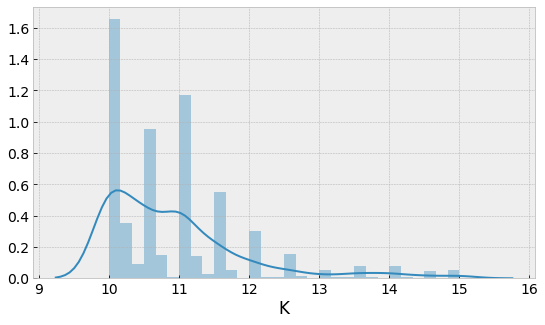

In [56]:
# HSPF
sns.distplot(df.K, bins=30)

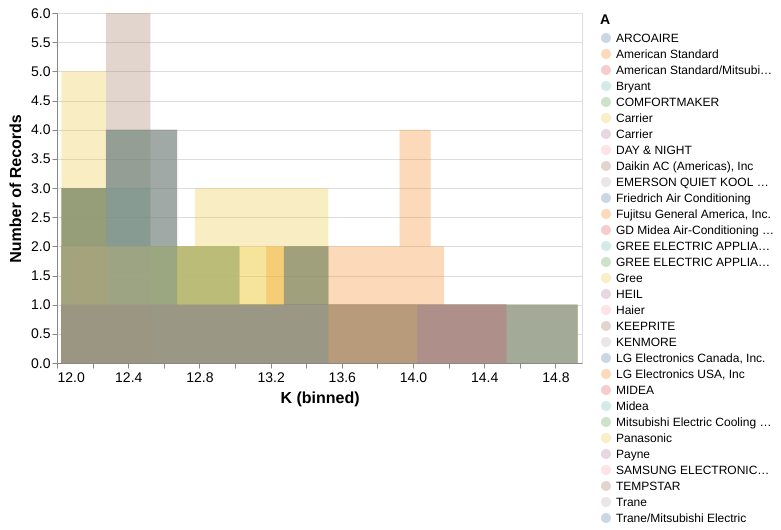

In [62]:
alt.Chart(df.query('K >= 12')).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('K:Q', bin=alt.Bin(maxbins=60)),
    alt.Y('count()', stack=None),
    alt.Color(
        'A:N',
    ),
    tooltip = 'A'
).interactive()

In [13]:
# save data to file to save space in notebook
#df_url = 'df.json'
#df.to_json(df_url, orient='records')

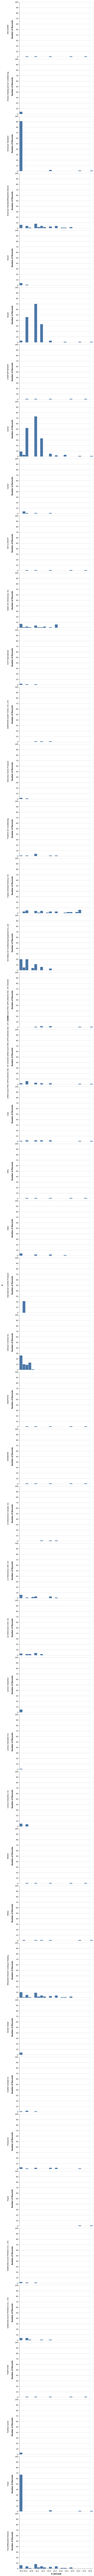

In [14]:
c = alt.Chart(df).mark_bar().encode(
    alt.X('K:Q', bin=alt.Bin(maxbins=30)),
    y = 'count()',
    row = 'A:N'
)
c

In [15]:
len(df)

1049

In [16]:
# Low Temperature Rating Point, deg F
# Only shows non-null values
df.BB.value_counts()

-13      52
-22      24
-5       17
-15      15
-4       10
-5°F     10
-13°F     9
0         7
-4°F      1
n/A       1
0°F       1
-5F       1
-13°      1
Name: BB, dtype: int64

In [17]:
# Max Input Power at 17 deg F
df.AF.describe()

# BAD Data Error here

count    1049.000000
mean       10.485637
std       138.913019
min         0.640000
25%         2.060000
50%         2.934620
75%         3.759503
max      2603.000000
Name: AF, dtype: float64

In [18]:
max17 = df.query('AF < 20').AF

In [19]:
max17.describe()

count    1046.000000
mean        3.050128
std         1.331349
min         0.640000
25%         2.060000
50%         2.930000
75%         3.742498
max         9.525000
Name: AF, dtype: float64

/data/data/com.termux/files/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


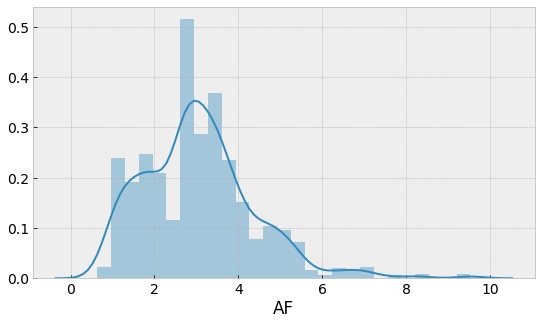

In [20]:
sns.distplot(max17)

In [21]:
# Max Input Power at 5 deg F, col AP
df.AP.describe()

count    1049.000000
mean        2.905972
std         1.251434
min         0.750000
25%         1.970000
50%         2.793660
75%         3.395520
max         8.353000
Name: AP, dtype: float64

In [22]:
# This rating is available.  Values are a bit less than those at 17 deg F.
# This combined with a COP can give us maximum output.

/data/data/com.termux/files/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


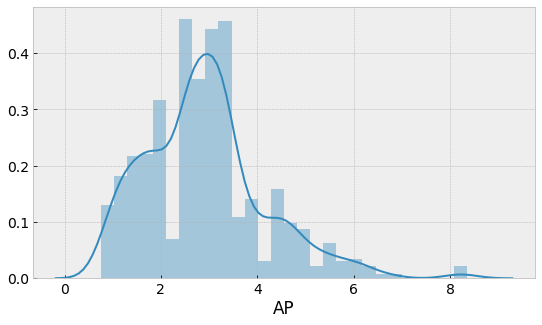

In [23]:
sns.distplot(df.AP)

## Conclusion
Should use Max Power at 5 deg F times a calculated COP to determine maximum capacity of the Heat Pump. Also need to put limits on the Max Power values, as there was one over 2,000 kW in 17 deg F data.  Max Power at 5 deg F is a bit less than Max Power at 17 deg F.

In [24]:
# COP at Coldest Temp, Max Capacity, column BK
df.BK.describe()

count    157.000000
mean       1.847781
std        0.283859
min        1.335937
25%        1.640000
50%        1.830000
75%        2.020000
max        2.870000
Name: BK, dtype: float64

/data/data/com.termux/files/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


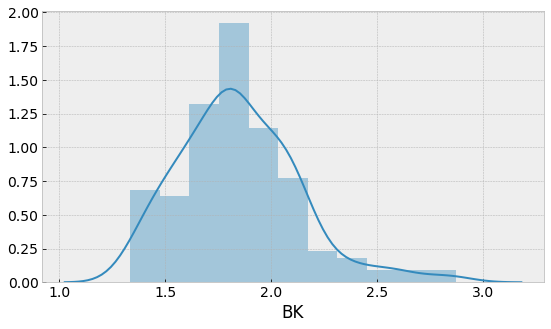

In [25]:
sns.distplot(df[~df.BK.isnull()].BK)

In [26]:
# Col M: Ducted or Ductless
df.M.value_counts()

Centrally Ducted    556
Ductless            489
Ductless              3
Ducted                1
Name: M, dtype: int64

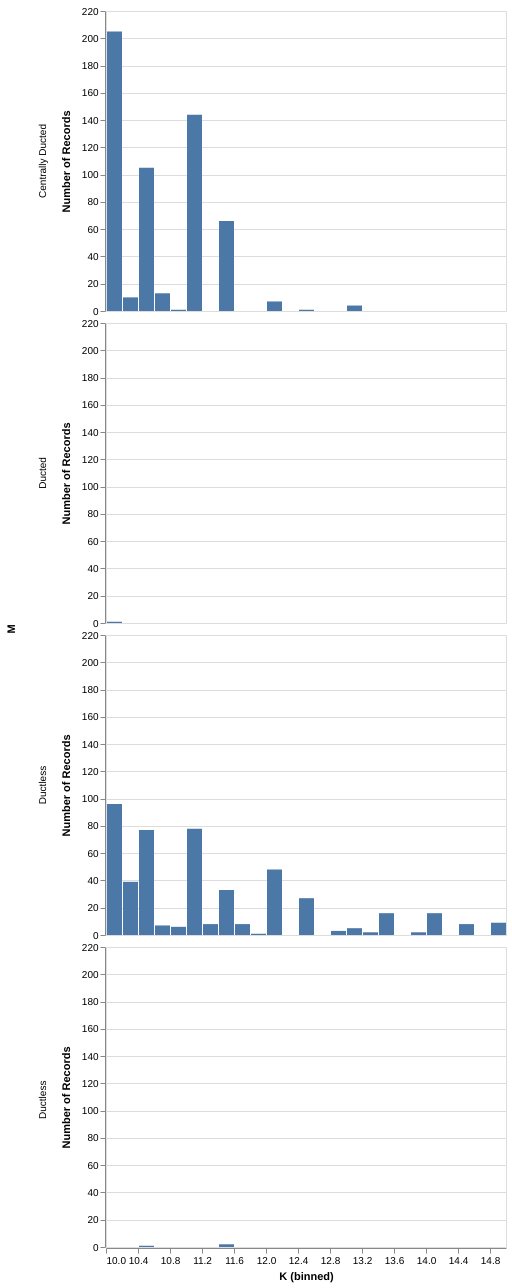

In [27]:
# HSPF by Ducted or Ductless
alt.Chart(df).mark_bar().encode(
    alt.X('K', bin=alt.Bin(maxbins=30)),
    y = 'count()',
    row = 'M'
)

## Conclusion
Probably should filter down to just Ductless heat pumps for the rest of the graphs.

## Issue
Need to decide whether Ducted heat pumps should be included in the calculator.

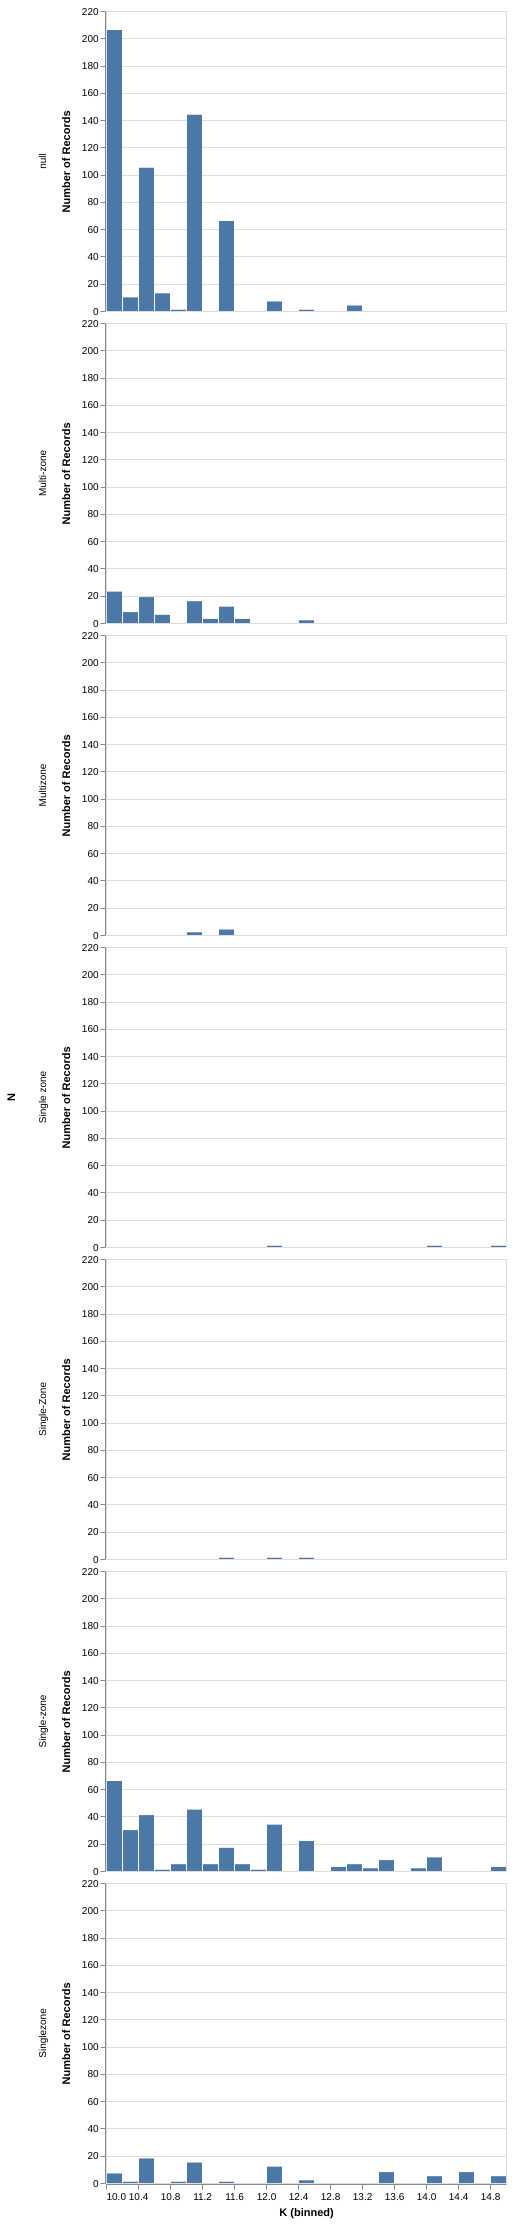

In [28]:
# Column N, multi zone or single if ductless
alt.Chart(df).mark_bar().encode(
    alt.X('K', bin=alt.Bin(maxbins=30)),
    y = 'count()',
    row = 'N'
)

## Conclusion
HSPF values are better for single-zone ductless heat pumps.

In [29]:
# Column L, Energy Star Certified
df.L.value_counts()

Yes    1049
Name: L, dtype: int64

## Conclusion
All of them are Energy Star certified.

In [30]:
# Analyze Manuf. COP value at 5, 17, and 47 deg F at Maximum capacity
#df_cop = pd.DataFrame({'5 deg F': df.AS, '17 deg F': df.AI, '47 deg F': df.Y})
dfdu = df.query('M != "Centrally Ducted"')
df_cop = pd.DataFrame({5: dfdu.AS, 17: dfdu.AI, 47: dfdu.Y})
df_cop.dropna(inplace = True)

df_cop.describe()

5           17          47
count  493.000000  493.000000  493.000000
mean     2.103426    2.384794    3.166171
std      0.294388    0.348438    0.464043
min      1.750000    1.761915    2.085976
25%      1.893105    2.118552    2.837130
50%      2.014809    2.320000    3.140000
75%      2.226000    2.595772    3.480000
max      2.937877    3.615743    4.700000

In [31]:
dfc = df_cop.melt(value_vars=[5, 17, 47], var_name='temperature', value_name='cop')
dfc.head()

temperature       cop
0            5  2.141159
1            5  2.150743
2            5  1.970871
3            5  2.080464
4            5  2.178222

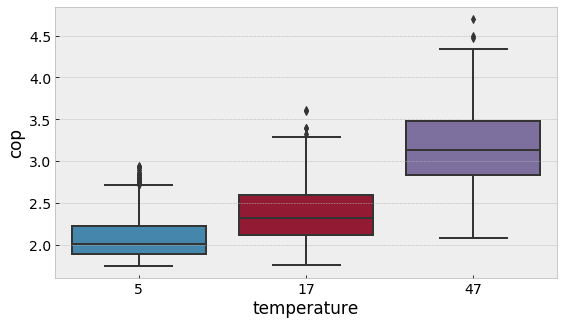

In [32]:
sns.boxplot(x="temperature", y="cop", data=dfc)
# Note that X axis is not spaced according to temperature value.

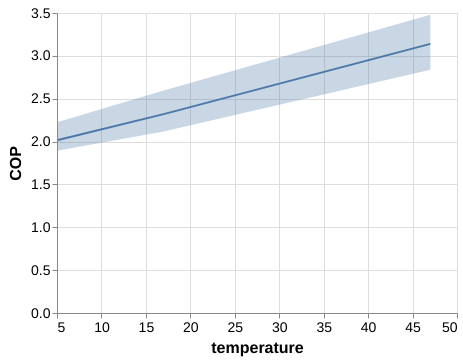

In [33]:
# Mean Values + 25th and 75th percentiles
line = alt.Chart(dfc).mark_line().encode(
    x = 'temperature',
    y = 'median(cop)'
)

middle_50 = alt.Chart(dfc).mark_area(opacity=0.3).encode(
    x='temperature',
    y=alt.Y('q1(cop)', axis=alt.Axis(title='COP')),
    y2='q3(cop)'
)
gfmt(line + middle_50)

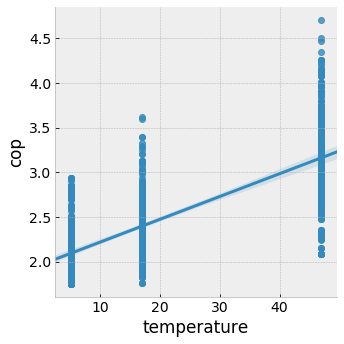

In [46]:
sns.lmplot(x="temperature", y="cop", data=dfc, ci=100)

## Conclusion
The median values look pretty close to what we measured on Phil's system, even though these are maximum capacity values.  The 47 deg F value probably won't be achieved due to cycling occurring before then.

In [34]:
# Analyze Manuf. Max Power value at 5, 17, and 47 deg F at Maximum capacity
df_pwr = pd.DataFrame({5: dfdu.AP, 17: dfdu.AF, 47: dfdu.V})
df_pwr.dropna(inplace = True)
dfp = df_pwr.melt(value_vars=[5, 17, 47], var_name='temperature', value_name='kW')
dfp = dfp.query('kW < 20')
dfp.head()

temperature     kW
0            5  1.095
1            5  1.131
2            5  2.290
3            5  1.720
4            5  1.790

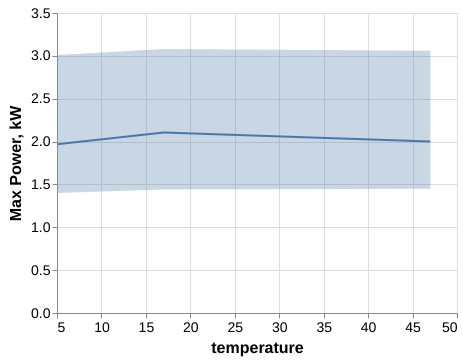

In [35]:
# Mean Values + 25th and 75th percentiles
line = alt.Chart(dfp).mark_line().encode(
    x = 'temperature',
    y = 'median(kW)'
)

middle_50 = alt.Chart(dfp).mark_area(opacity=0.3).encode(
    x='temperature',
    y=alt.Y('q1(kW)', axis=alt.Axis(title='Max Power, kW')),
    y2='q3(kW)'
)
gfmt(line + middle_50)

In [36]:
# Best Systems, K = HSPF, AP = Max Power at 5 deg F, AM = Max Capacity at 5 deg F
dfb = dfdu[['A', 'F', 'K', 'AP', 'AM']]
dfb.sort_values(by='K', ascending=False).head(30)

A                  F  \
661                                                Gree     SAP09HP230V1AO   
1009                                              Trane    4TXK3809A10NUAA   
303                                              Bryant       38MPRAQ09AA3   
840                                               Midea       38MPRAQ09AA3   
485                                             Carrier       38MPRAQ09AA3   
686   GREE ELECTRIC APPLIANCES INC. OF ZHUHAI\nGREE ...  GWH09YD-D3DNA1A/O   
915                                               Payne       38MPRAQ09AA3   
59                                    American Standard    4TXK3809A10NUAA   
665             GREE ELECTRIC APPLIANCES INC. OF ZHUHAI        TW09HQ3D6DO   
494                                        COMFORTMAKER       DLCPRAH09AAK   
932                                            TEMPSTAR       DLCPRAH09AAK   
137                                            ARCOAIRE       DLCPRAH09AAK   
698                                                HEIL       DLCPRAH09AAK   
525                                         DAY & NIGHT       DLCPRAH09AAK   
783                                            KEEPRITE       DLCPRAH09AAK   
788                                             KENMORE       DLCPRAH09AAK   
842                                               MIDEA       DLCPRAH09AAK   
567                       Fujitsu General America, Inc.           AOU9RLS3   
573                       Fujitsu General America, Inc.           AOU9RLS3   
687   GREE ELECTRIC APPLIANCES INC. OF ZHUHAI\nGREE ...  GWH12YD-D3DNA1A/O   
568                       Fujitsu General America, Inc.          AOU9RLS3H   
841                                               Midea       38MPRAQ12AA3   
304                                              Bryant       38MPRAQ12AA3   
916                                               Payne       38MPRAQ12AA3   
575                       Fujitsu General America, Inc.          AOU12RLS3   
666             GREE ELECTRIC APPLIANCES INC. OF ZHUHAI        TW12HQ3D6DO   
907                                           Panasonic         CU-XE9SKUA   
563                       Fujitsu General America, Inc.          AOU12RLS3   
486                                             Carrier       38MPRAQ12AA3   
574                       Fujitsu General America, Inc.          AOU9RLS3H   

         K      AP       AM  
661   15.0  1.8216  12976.6  
1009  15.0  1.7200  12210.0  
303   15.0  1.9360  13047.0  
840   15.0  1.9360  13047.0  
485   15.0  1.9360  13047.0  
686   15.0  1.8200  12977.0  
915   15.0  1.9360  13047.0  
59    15.0  1.7200  12210.0  
665   15.0  1.8216  12976.6  
494   14.5  1.9360  13047.0  
932   14.5  1.9360  13047.0  
137   14.5  1.9360  13047.0  
698   14.5  1.9360  13047.0  
525   14.5  1.9360  13047.0  
783   14.5  1.9360  13047.0  
788   14.5  1.9360  13047.0  
842   14.5  1.9360  13047.0  
567   14.2  2.1000  15000.0  
573   14.2  2.1000  15000.0  
687   14.0  0.8600   8000.0  
568   14.0  2.2500  15000.0  
841   14.0  2.0740  12897.0  
304   14.0  2.0740  12897.0  
916   14.0  2.0740  12897.0  
575   14.0  2.1000  16500.0  
666   14.0  0.8600   8000.0  
907   14.0  1.7300  11000.0  
563   14.0  2.1000  16500.0  
486   14.0  2.0740  12897.0  
574   14.0  2.2500  15000.0

## Custom Theme for Altair Charts

See:  https://altair-viz.github.io/user_guide/configuration.html#altair-themes

In [37]:
# define the theme by returning the dictionary of configurationsa
def larger():
    return {
        'config': {
            'view': {
                'height': 350,
                'width': 525,
            },
            'axis': {
                'labelFontSize': 14, 
                'titleFontSize': 16
            },
            'legend': {
                'labelFontSize': 12, 
                'titleFontSize': 14
            },
        }
    }

# register the custom theme under a chosen name
alt.themes.register('larger', larger)

# enable the newly registered theme
alt.themes.enable('larger')

ThemeRegistry.enable('larger')

### Notes

If you would like to use any theme just for a single chart, you can use the with statement to enable a temporary theme:

```python
with alt.themes.enable('default'):
    spec = chart.to_json()
```

If you want to restore the default theme, use:

```python
alt.themes.enable('default')
```

## Sample Graph to show COPs collected from different sources.

In [38]:
d = {
    'COP': [2.2, 2.8, 3.5, 2.1, 2.7, 3.4],
    'Temperature': [5., 17., 47.]*2,
    'Source': ['ACEEE']*3 + ['CADMUS']*3,
    '# of Units': [8]*3 + [13]*3,
    'Study Type': ['field']*3 + ['spec']*3,
    'Selected': [1]*3 + [0]*3,
}
dfp = pd.DataFrame(d)
dfp

COP  Temperature  Source  # of Units Study Type  Selected
0  2.2          5.0   ACEEE           8      field         1
1  2.8         17.0   ACEEE           8      field         1
2  3.5         47.0   ACEEE           8      field         1
3  2.1          5.0  CADMUS          13       spec         0
4  2.7         17.0  CADMUS          13       spec         0
5  3.4         47.0  CADMUS          13       spec         0

Experiments below to set the opacity of the line so as to highlight one line but still show the entire set of lines, but dimmed out.

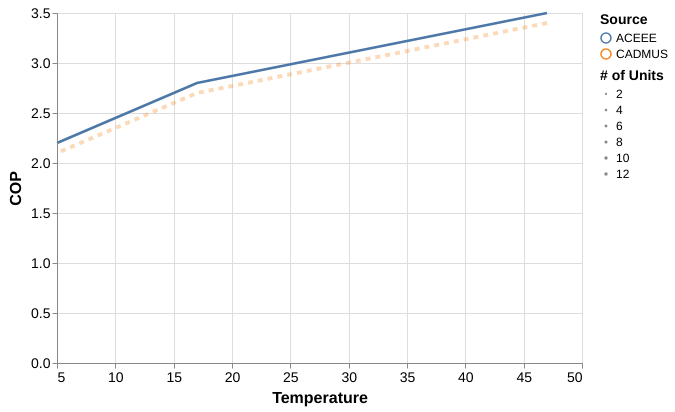

In [39]:
line1 = alt.Chart(dfp[dfp['Study Type']=='field']).mark_line().encode(
    x = 'Temperature',
    y = 'COP',
    color = 'Source',
    size = '# of Units',
    opacity = alt.value(1.0),
    #opacity = 'Selected:N',
)
line2 = alt.Chart(dfp[dfp['Study Type']=='spec']).mark_line(strokeDash=[5,5]).encode(
    x = 'Temperature',
    y = 'COP',
    color = 'Source',
    size = '# of Units',
    opacity = alt.value(0.3),
    #opacity = 'Selected:N',
)
line1 + line2

In [40]:
default = alt.themes.get()
default()

{'config': {'view': {'height': 350, 'width': 525},
  'axis': {'labelFontSize': 14, 'titleFontSize': 16},
  'legend': {'labelFontSize': 12, 'titleFontSize': 14}}}

In [41]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

credentials = ServiceAccountCredentials.from_json_keyfile_name('Spreadsheet Tools-9c58cde8ddd8.json', scope)

gc = gspread.authorize(credentials)

wks = gc.open("test_gspread").sheet1  # couldn't seem to get ID number name approach to work.

In [42]:
wks.get_all_records()

[{'study': 'CADMUS VT', 'temperature': 5, 'cop': 2.2},
 {'study': 'CADMUS VT', 'temperature': 17, 'cop': 2.5},
 {'study': 'CADMUS VT', 'temperature': 47, 'cop': 4}]